# Catalyst



In [12]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import accuracy_score
from skorch import NeuralNet
from skorch.callbacks.scoring import EpochScoring
from torch import nn
from torch.nn import functional as F
from torch.optim import SGD
import torch
from torch.utils.data import DataLoader, TensorDataset
from catalyst.dl import SupervisedRunner
from utils.vis import plot_decision_space, visualize_data
from utils.metrics import calculate_acc
from catalyst import dl
from catalyst.utils import metrics
from catalyst.dl import SupervisedRunner, \
    CriterionCallback, AccuracyCallback
RANDOM_STATE = 45

np.random.seed(RANDOM_STATE)

%matplotlib inline

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(7)


# Prepare and Visualize data

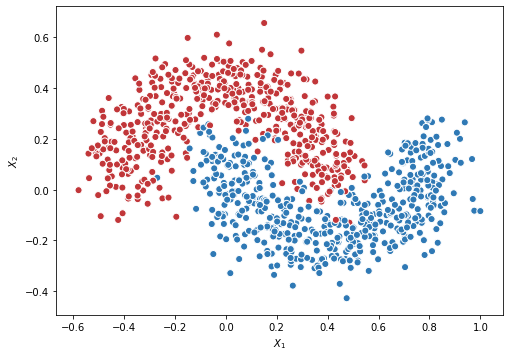

In [13]:
N_FEATURES = 2

# X, Y = make_blobs(centers=2, random_state=RANDOM_STATE, n_features=N_FEATURES)
X, Y = make_moons(n_samples=1000, noise=0.2)
X = X/np.abs(X).max()
visualize_data(X,Y)


In [50]:

class NN(nn.Module):
    def __init__(self, n_in):

        super(NN, self).__init__()
        self.fc1 = nn.Linear(2, 10, bias=True)
        self.fc2 = nn.Linear(10, 100, bias=True)
        self.fc3 = nn.Linear(100, 10, bias=True)
        self.fc4 = nn.Linear(10, 100, bias=True)
        self.fc5 = nn.Linear(100, 1, bias=True)
        
    def forward(self, x):
        return self.fc5(F.relu(self.fc4(F.relu(self.fc3(F.relu(self.fc2(F.relu(self.fc1(x)))))))))
    


In [51]:
num_epochs = 30
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# init the model, loss and optimizer
net = NN(2)
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()
net = net.to(DEVICE)

ds = TensorDataset(torch.Tensor(X), torch.Tensor(Y).unsqueeze(1))
loader = DataLoader(ds, batch_size=32, num_workers=1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, [3, 6])
loaders = {'train': loader, 'valid': loader}

runner = SupervisedRunner()
runner.train(
    model=net,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    callbacks=[AccuracyCallback(threshold=0.2)],
    loaders=loaders,
    logdir='/home/i008/test',
    num_epochs=num_epochs,
    verbose=False,
)
        

[2020-07-21 01:42:41,335] 
1/30 * Epoch 1 (_base): lr=0.0100 | momentum=0.9000
1/30 * Epoch 1 (train): accuracy01=0.7160 | loss=0.4961
1/30 * Epoch 1 (valid): accuracy01=0.8700 | loss=0.2916
[2020-07-21 01:42:41,653] 
2/30 * Epoch 2 (_base): lr=0.0100 | momentum=0.9000
2/30 * Epoch 2 (train): accuracy01=0.8760 | loss=0.2717
2/30 * Epoch 2 (valid): accuracy01=0.8980 | loss=0.2288
[2020-07-21 01:42:41,983] 
3/30 * Epoch 3 (_base): lr=0.0001 | momentum=0.9000
3/30 * Epoch 3 (train): accuracy01=0.9150 | loss=0.2037
3/30 * Epoch 3 (valid): accuracy01=0.9570 | loss=0.1254
[2020-07-21 01:42:42,302] 
4/30 * Epoch 4 (_base): lr=0.0010 | momentum=0.9000
4/30 * Epoch 4 (train): accuracy01=0.9600 | loss=0.1210
4/30 * Epoch 4 (valid): accuracy01=0.9630 | loss=0.1151
[2020-07-21 01:42:42,608] 
5/30 * Epoch 5 (_base): lr=0.0010 | momentum=0.9000
5/30 * Epoch 5 (train): accuracy01=0.9620 | loss=0.1117
5/30 * Epoch 5 (valid): accuracy01=0.9670 | loss=0.1071
[2020-07-21 01:42:42,928] 
6/30 * Epoch 6 (_b

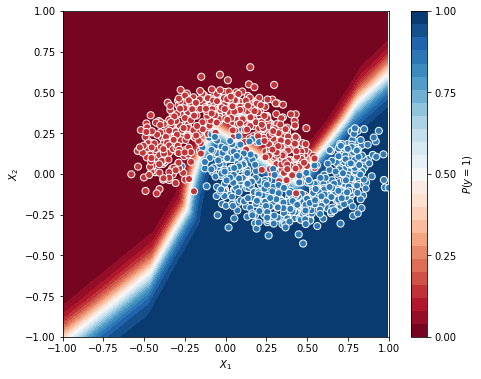

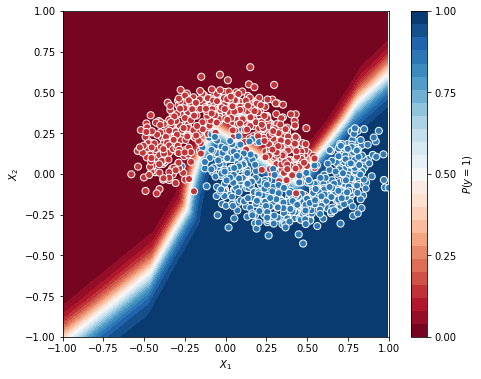

In [52]:
plot_decision_space(net, X, Y)